In [10]:
from math import log
from random import random


class Base(dict):
    """Container for Stochastic Simulation Algorithms (SSA)"""

    def __init__(
        self,
        initial_conditions,
        propensities,
        stoichiomemtry
    ):
        """Initialize SSA"""
        self._propen = sorted(propensities.items(), reverse=True)
        self._stoich = sorted(stoichiometry.items(), reverse=True)
        self._exclud = dict(propen=list(), stoich=list())
        super().__init__(**initial_conditions)
        
    def direct(self):
        """Indefinite generator of direct-method trajectories"""
        while True:
            while not self.exit():
                
                # init step: evaluate propensities and partition
                weights = list((k, v(self)) for k,v in self.propen)
                partition = sum(tup[1] for tup in weights)
                
                # monte carlo step 1: next reaction time
                sojourn = log(1.0 / random()) / partition
                self["time"].append(
                    self["time"][-1] + sojourn
                )
                
                # monte carlo step 2: next reaction
                partition = partition * random()
                j = len(weights) - 1
                while partition >= 0.0:
                    partition -= weights.pop()[1]
                    j -= 1
                
                # final step: update reaction species
                for species, delta in self.stoich[j][1]:
                    self[species].append(
                        self[species][-1] + delta
                    )
                    
            yield self
            self.reset()
    
    def exit(self, *args, **kwargs):
        """Determine if simulation should exit"""
        raise NotImplementedError
        
    def first_reaction(self):
        """Indefinite generator of 1st-reaction trajectories"""
        while True:
            while not self.exit():

                # monte carlo step: generate reaction times
                times = list(
                    (k,  log(1.0 / random()) / v(model))
                    for k,v in self.propen
                ).sort(key=lambda t: t[1])

                # update next reaction time
                model["time"].append(times[0][1])

                # update reaction species
                reaction_stoich = self.stoich[times[0][0]]
                for species, delta in reaction_stoich:
                    self[species] += delta
                    
            yield self
            self.reset()
            
    @property
    def propen(self, *args, **kwargs):
        """Fetch valid propensities"""
        for key in self:
            if key == "time":
                continue
            for rxn, sto in self._stoich:
                if self[key][-1] + sto[key] < 0:
                    self._exclud[
                        "stoich"
                    ] = self._stoich.pop(rxn)
                    self._exclud[
                        "propen"
                    ] = self._propen.pop(rxn)
            for rxn, sto in self._exclud:
                if not (self[key][-1] + sto[key] < 0):
                    self._stoich[rxn] = sto
        return self._propen
        
    def reset(self, *args, **kwargs):
        """Clean up self for whatever reason"""
        raise NotImplementedError
        
    @property
    def stoich(self, *args, **kwargs):
        """Fetch valid propensities"""
        raise NotImplementedError
        
        
#     def curate(self):
#         for key in self:
#             if key == "time":
#                 continue
#             if self[key][-1] == 0:
#                 for rxn, sto in self.stoich:
#                     if sto[key] < 0:
#                         self.exclud[
#                             "stoich"
#                         ] = self.stoich.pop(rxn)
#                         self.exclud[
#                             "propen"
#                         ] = self.propen.pop(rxn)

In [11]:
class Epidemic(Base):
    """Epidemic without vital dynamics"""
    
    def exit(self):
        if self["r"][-1] == 300:
        else:
            return False
            
    def reset(self, tail=False):
        if tail:
            for key in self:
                del self[key][-1]
        for key in self:
            del self[key][1:]
            

In [12]:
# initial species counts and sojourn times
initital_conditions = {
    "s": [290],
    "i": [10],
    "r": [0],
    "time": [0.0],
}


# propensity functions
propensities = {
    0: lambda d: 3.0 * d["s"][-1] * d["i"][-1] / 300,
    1: lambda d: 5.0 * d["i"][-1],
}


# change in species for each propensity
stoichiometry = {
    0: {"s": -1, "i": 1, "r": 0},
    1: {"s": 0, "i": -1, "r": 1},
}


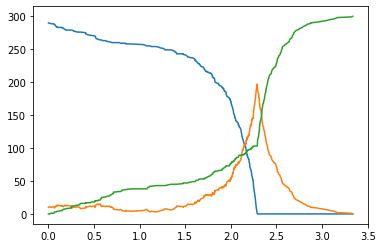

In [13]:
from matplotlib import pyplot, rcParams


# make figure 10" x 3", 200 dots per inch
# rcParams["figure.figsize"] = 10, 3
# rcParams["figure.dpi"] = 200


# # instantiate figure and axes
# figure, axes = pyplot.subplots(1, 3)


# append trajectories to plot
epidemic = Epidemic(
    initital_conditions,
    propensities,
    stoichiometry
)
trajectories = 0
for trajectory in epidemic.direct():
    pyplot.plot(trajectory["time"], trajectory["s"])
    pyplot.plot(trajectory["time"], trajectory["i"])
    pyplot.plot(trajectory["time"], trajectory["r"])
    trajectories += 1
    if trajectories == 1:
        break
pyplot.show()

In [ ]:
    def direct(self):
        """Indefinite generator of direct-method trajectories"""
        while True:
            while not self.exit():
                
                # init step: evaluate propensities and partition
                weights = list((k, v(self)) for k,v in self.propen)
                partition = sum(tup[1] for tup in weights)
                
                # monte carlo step 1: next reaction time
                sojourn = log(1.0 / random()) / partition
                self["time"].append(
                    self["time"][-1] + sojourn
                )
                
                # monte carlo step 2: next reaction
                partition = partition * random()
                j = len(weights) - 1
                while partition >= 0.0:
                    partition -= weights.pop()[1]
                    j -= 1
                reaction_stoich = self.stoich[j][1]
                
                # final step: update reaction species
                for species, delta in reaction_stoich.items():
                    self[species].append(
                        self[species][-1] + delta
                    )
                    
            yield self
            self.reset()